In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectra

# 7.2 Get the Line Shape

# 7.3 Get the Line Intensity

In [2]:
'''
Humans = the data collected when we stood in front of the Horn
ColdSky = this is the data collected by pointing the horn at a patch of "cold" sky
ConvertedH = this converts the data into millivolts
VoltageH = this Fourier transforms the above data into a power spectrum
'''

Humans = np.loadtxt('humans0')     
ColdSky = np.loadtxt('ColdSky0')   

volt = 100 # millivolts

ConvertedH = Humans*volt/2**15   
VoltageH = np.fft.fft(ConvertedH) 
freqsH = np.fft.fftfreq(len(ConvertedH))
PowerH = np.abs(VoltageH)**2

ConvertedCS = ColdSky*volt/2**15
VoltageCS = np.fft.fft(ConvertedCS)
freqsCS = np.fft.fftfreq(len(ConvertedCS))
PowerCS = np.abs(VoltageCS)**2

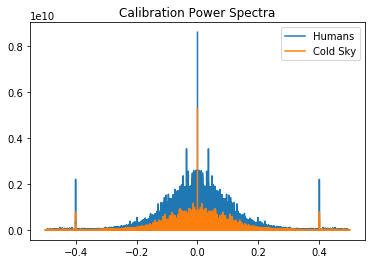

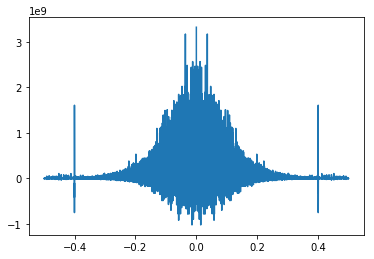

In [5]:
'''
Here, I plot power spectra for our calibration measurements. 
PowerH = Power spectrum from pointing the horn at a group of humans

'''

B = PowerH
plt.title('Calibration Power Spectra')
B[len(PowerH)//2-1000:len(PowerH)//2+1000]=0
plt.plot(freqsH,PowerH,label='Humans')
plt.plot(freqsCS, PowerCS,label='Cold Sky')
plt.legend()
plt.show()
plt.plot(freqsH,PowerH-PowerCS)
plt.show()

## Gaussian for Horn at Zenith

In [6]:
gaus = np.loadtxt('lower1')

In [7]:
#np.savez('Gaussian.npz',data=gaus)

# Figure 2:

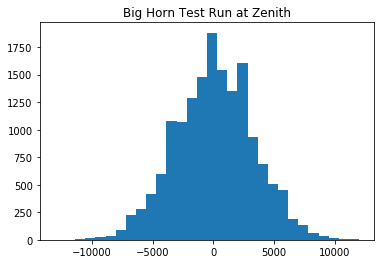

In [16]:
'''
This gives us the histogram of one of our data capture test runs. The x-axis
plots measured signal, where 2^15 = 100mV.  
'''
plt.hist(gaus[0:16000],bins=30)
plt.title('Big Horn Test Run at Zenith')

plt.show()

### Calculating the gain, G:

In [13]:
'''
This is my attempt at coding up a version of equation 2 in the lab manual.
'''
S_cal = PowerH
S_cold = PowerCS
T_cal = 310.15 #Kelvin
T_cold = 3 #Kelvin

G = (T_cal-T_cold)*np.sum(S_cold)/np.sum(S_cal-S_cold) 
print('G = ', G, 'Kelvin')

G =  186.5622306539317 Kelvin
